In [ ]:
# Import libraries

# upgrading seaborn to latest version
!pip install seaborn --upgrade
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)
from dateutil import parser


# Natural Language tookit
import nltk
# Regular expression
import re
# import string library for text preprocessing
import string

# obtain additional stopwords from nltk
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# import keras
from keras.preprocessing import text, sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# word cloud
from wordcloud import WordCloud, STOPWORDS

import json

import warnings
warnings.filterwarnings('ignore')

0.13.0


In [ ]:
# Load the data
df_true = pd.read_csv("./True.csv") # loading Real news
df_fake = pd.read_csv("./Fake.csv") # loading Fake news

In [ ]:
# visualizing 5 rows of true news
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [ ]:
# visualizing 5 rows of false news
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [ ]:
# displaying shape of our ture news dataset 21417 rows and 4 columns
df_true.shape

(21417, 4)

In [ ]:
# displaying shape of our fake news dataset 21417 rows and 4 columns
df_fake.shape

(23481, 4)

In [ ]:
# add target column to identify real and fake news
df_true['target'] = 1
df_fake['target'] = 0

In [ ]:
# shape of our true news dataset after add new 'target' column
df_true.shape

(21417, 5)

In [ ]:
# shape of our fake news dataset after add new 'target' column
df_fake.shape

(23481, 5)

In [ ]:
# Merging the 2 datasets
df = pd.concat([df_true, df_fake], ignore_index=True, sort=False)

# show 5 rows
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  target  
0  December 31, 2017        1  
1  December 29, 2017        1  
2  December 31, 2017        1  
3  December 30, 2017        1  
4  December 29, 2017        1

In [ ]:
# showing 10 rows
df.tail()

title  \
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
44893  21st Century Wire says As 21WIRE reported earl...  Middle-east   
44894  21st Century Wire says It s a familiar theme. ...  Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
44896  21st Century Wire says Al Jazeera America will...  Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                   date  target  
44893  January 16, 2016       0  
44894  January 16, 2016       0  
44895  January 15, 2016       0  
44896  January 14, 2016       0  
44897  January 12, 2016       0

In [ ]:
# shape of our dataset after concatenating true and false news datasets
df.shape

(44898, 5)

In [ ]:
# no null values
df.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [ ]:
# displaying columns of our dataset
df.columns

Index(['title', 'text', 'subject', 'date', 'target'], dtype='object')

In [ ]:
# distribution of our target variable
df['target'].value_counts()

0    23481
1    21417
Name: target, dtype: int64

In [ ]:
# distribution of target variable in percentage
df['target'].value_counts(normalize=True)

0    0.522985
1    0.477015
Name: target, dtype: float64

# Visualizations


In [ ]:
df.target.value_counts()

0    23481
1    21417
Name: target, dtype: int64

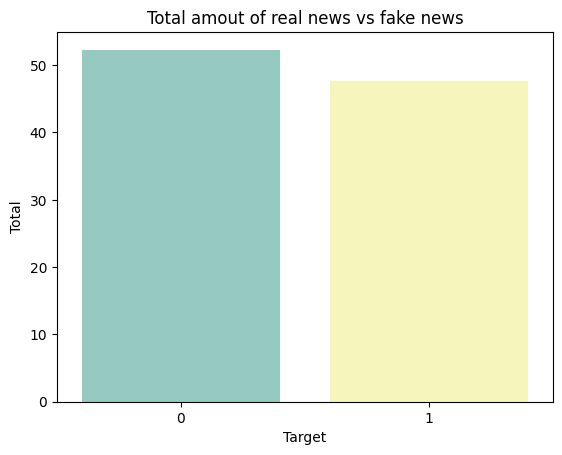

In [ ]:
# showing bargraph and pie chart for distribution of target variable
g1 = sns.countplot(df, x = 'target',palette="Set3", stat='percent');
g1.set_title("Total amout of real news vs fake news")
g1.set_ylabel("Total")
g1.set_xlabel("Target")
plt.show()

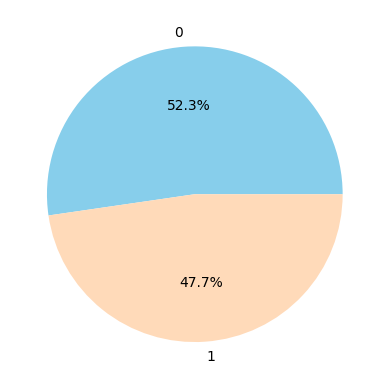

In [ ]:
g2 = plt.pie(df["target"].value_counts().values, explode=[0,0], labels=df.target.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
plt.show()

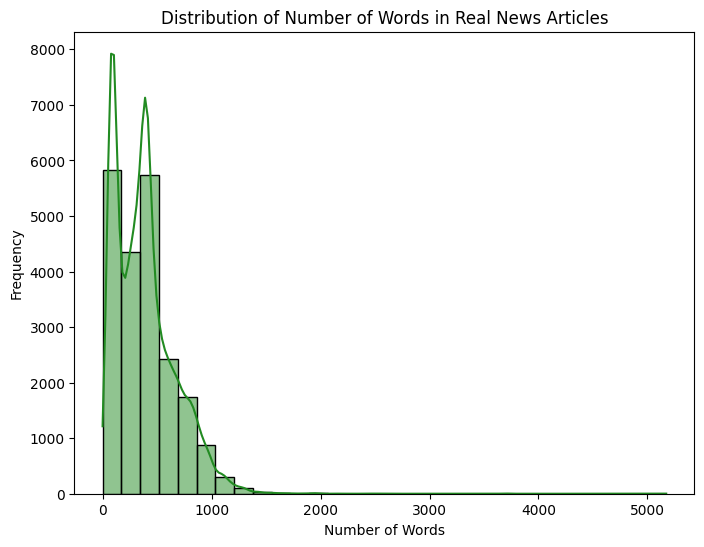

In [ ]:
# showing the frequency distribution of words in Real news
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=df[df['target'] == 1]['text'].apply(lambda x: len(x.split())), bins=30, kde=True, color='forestgreen')
plt.title('Distribution of Number of Words in Real News Articles')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

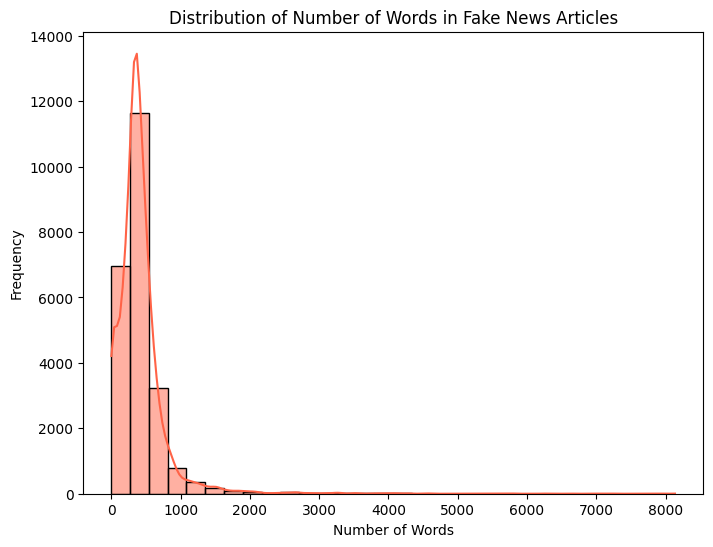

In [ ]:
# showing the frequency distribution of words in  Fake news
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=df[df['target'] == 0]['text'].apply(lambda x: len(x.split())), bins=30, kde=True, color='tomato')
plt.title('Distribution of Number of Words in Fake News Articles')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

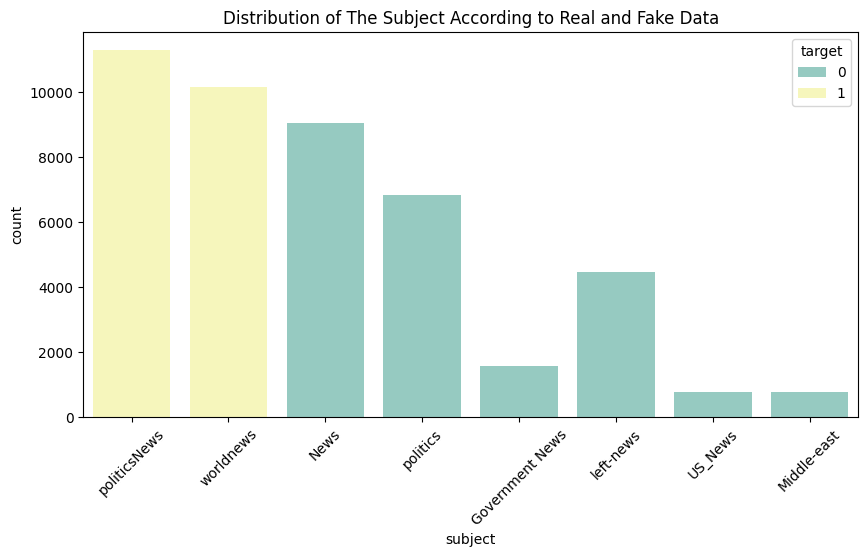

In [ ]:
# distribution of real and fake news depending upon the category
print(df.subject.value_counts())
plt.figure(figsize=(10, 5))

ax = sns.countplot(x="subject",  hue='target', data=df, palette="Set3")
plt.xticks(rotation=45)
plt.title("Distribution of The Subject According to Real and Fake Data")

# Data Cleaning

In [ ]:
# dropping date column because this column is not required during training
df.drop(columns = ['date'], inplace = True, errors='ignore')

In [ ]:
# creating a full_news column concatenating subject, title and text
df['full_news']= df['subject'] + " " + df['title'] + " " + df['text']
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  target  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews       1   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews       1   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews       1   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews       1   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews       1   

                                           full_news  
0  politicsNews As U.S. budget fight looms, Repub...  
1  politicsNews U.S. military to accept transgend...  
2  politicsNews Senior U.S. Republican senator: '...  
3  politicsNews FBI Russia probe helped by Austra...  
4  politicsNews Trump wants Postal Service to cha...

In [ ]:
# looking at the concatenated value of 1st row of our dataset
df['full_news'][0]

'politicsNews As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional incr

# Data Cleaning



In [ ]:
# download models for sentence tokenization and word tokenization
nltk.download('punkt')
# download stopwords
nltk.download('stopwords')
# database of English words and their semantic relationship
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
 # Convert text to lowercase
def convert_to_lower_case(text):
  return text.lower()

In [ ]:
def remove_punctuation(text):
  # Create a translation table to remove punctuation
  translator = str.maketrans('', '', string.punctuation)

  # Remove punctuation using the translation table
  text_without_punct = text.translate(translator)

  return text_without_punct

In [ ]:
def tokenize(text):
  # Tokenization
  return word_tokenize(text)

In [ ]:
# Remove stopwords
def remove_stop_words(tokens):
  stop_words = set(stopwords.words('english'))
  return [word for word in tokens if word not in stop_words]

In [ ]:
def lemmatize(tokens):
  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(word) if lemmatizer.lemmatize(word) is not None else word for word in tokens]


In [ ]:
# Remove special characters and numbers
def remove_special_chars(tokens):
  return [re.sub('[^A-Za-z]+', '', word) for word in tokens]

In [ ]:
# function to do preprocessing text
def preprocess_text(text):
  lower_text = convert_to_lower_case(text) # converting to lowercase
  removed_punctuation = remove_punctuation(lower_text) # removing punctuation
  tokens = tokenize(removed_punctuation) # tokenize words
  tokens = remove_stop_words(tokens) # removing stop words
  tokens = lemmatize(tokens) # lemmatize tokens
  tokens = remove_special_chars(tokens) # remove special characters from token

  preprocessed_text = ' '.join(tokens) # final preprocessed text
  return preprocessed_text

In [ ]:
# Apply function on text column
df['clean_news']=df['full_news'].apply(preprocess_text)

In [ ]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  target  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews       1   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews       1   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews       1   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews       1   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews       1   

                                           full_news  \
0  politicsNews As U.S. budget fight looms, Repub...   
1  politicsNews U.S. military to accept transgend...   
2  politicsNews Senior U.S. Republican senator: '...   
3  politicsNews FBI Russia probe helped by Austra...   
4  politicsNews Trump wants Postal Service to cha...   

                                          clean_news  
0  politicsnews u budget fight loom republican fl...  
1  politicsnews u military accept transgender rec...  
2  politicsnews senior u republican senator let m...  
3  politicsnews fbi russia probe helped australia...  
4  politicsnews trump want postal service charge ...

# Word Cloud Visualization after data cleaning

1. WordCloud for Real News


(-0.5, 999.5, 999.5, -0.5)

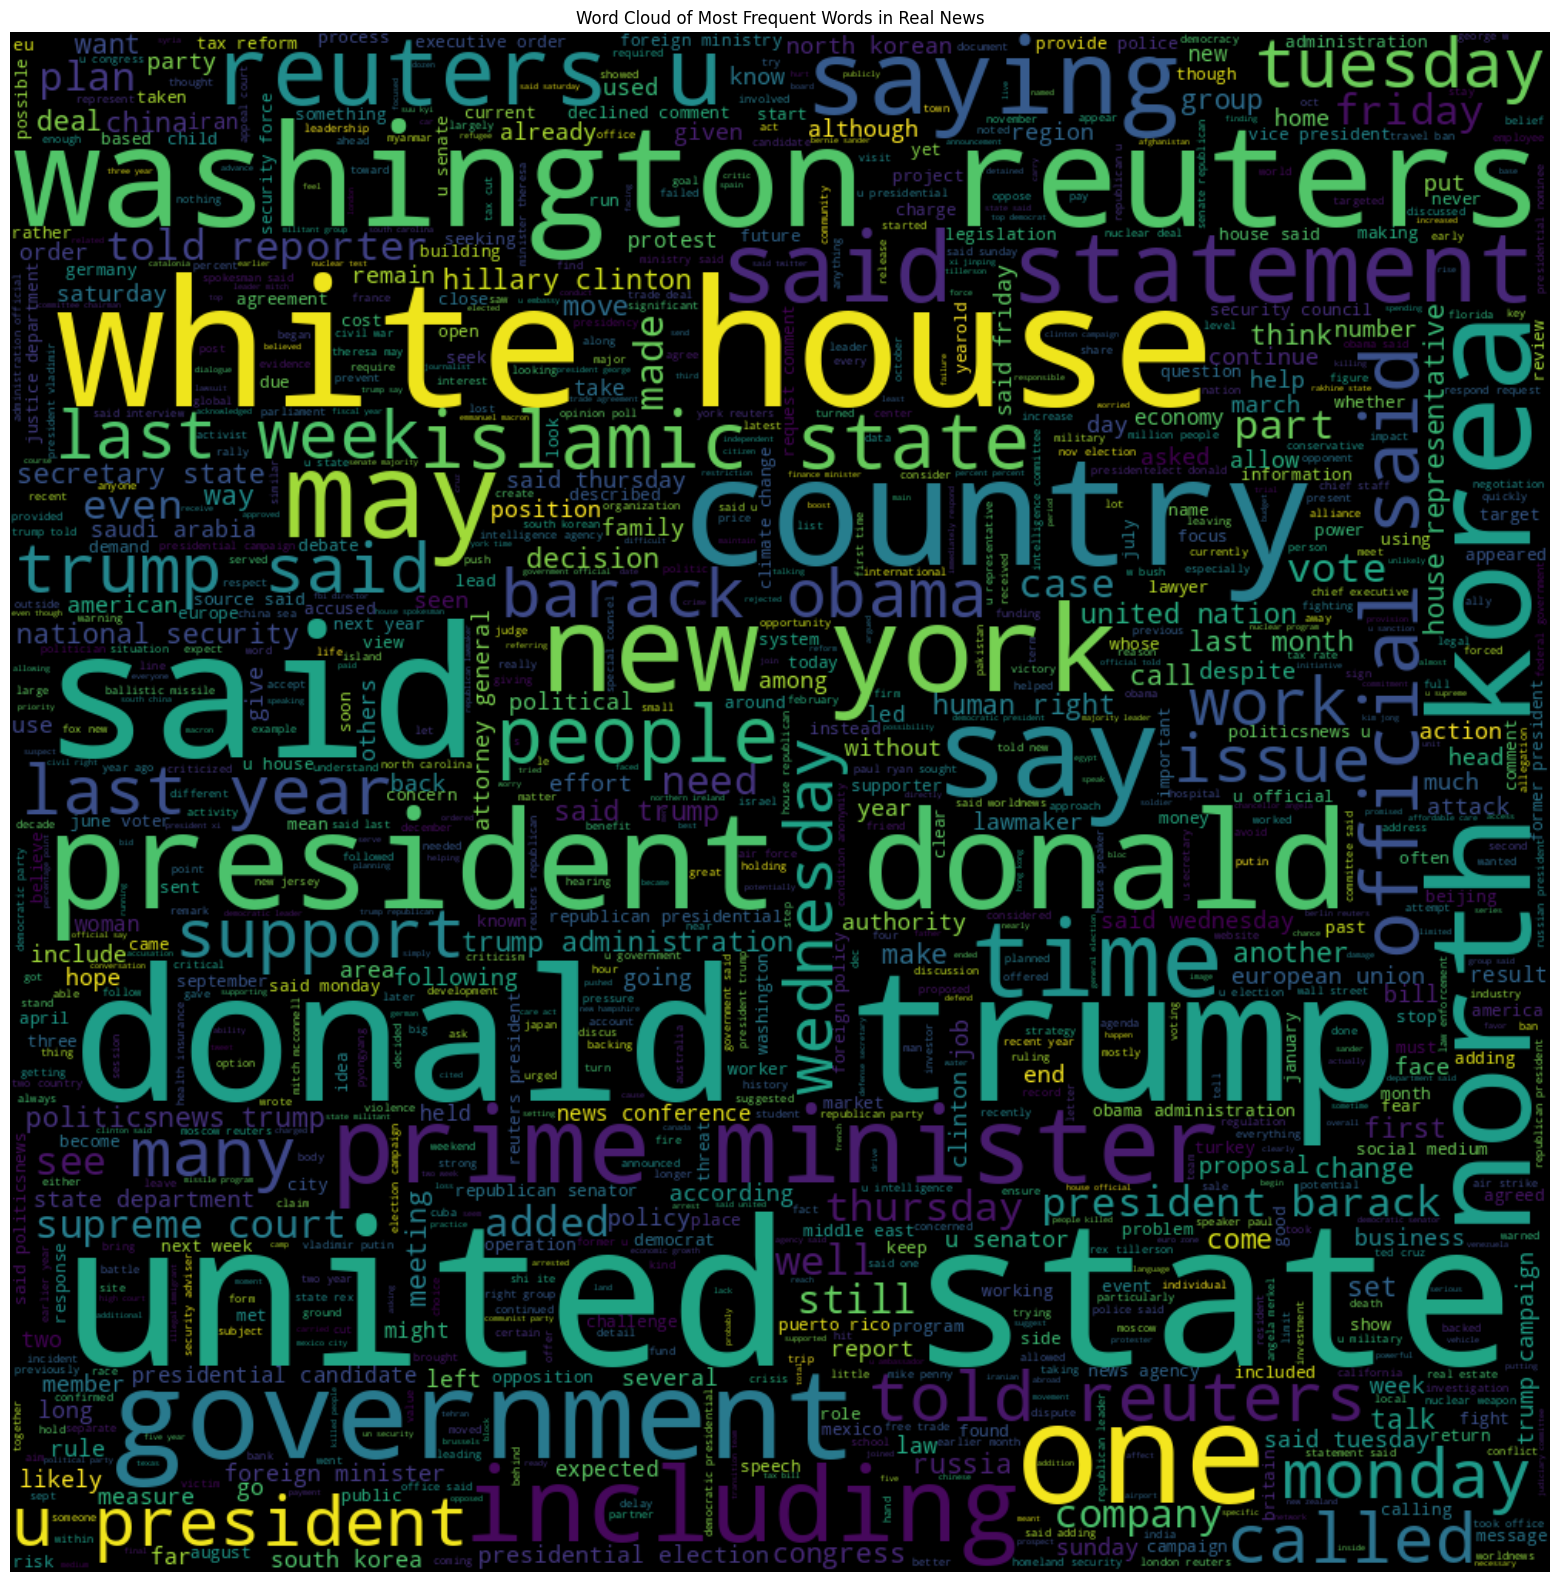

In [ ]:
# showing world cloud for real news
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1000 , height = 1000 , stopwords = STOPWORDS).generate(" ".join(df[df.target == 1].clean_news))
plt.title('Word Cloud of Most Frequent Words in Real News')
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')

2. WordCloud for Fake News


(-0.5, 999.5, 999.5, -0.5)

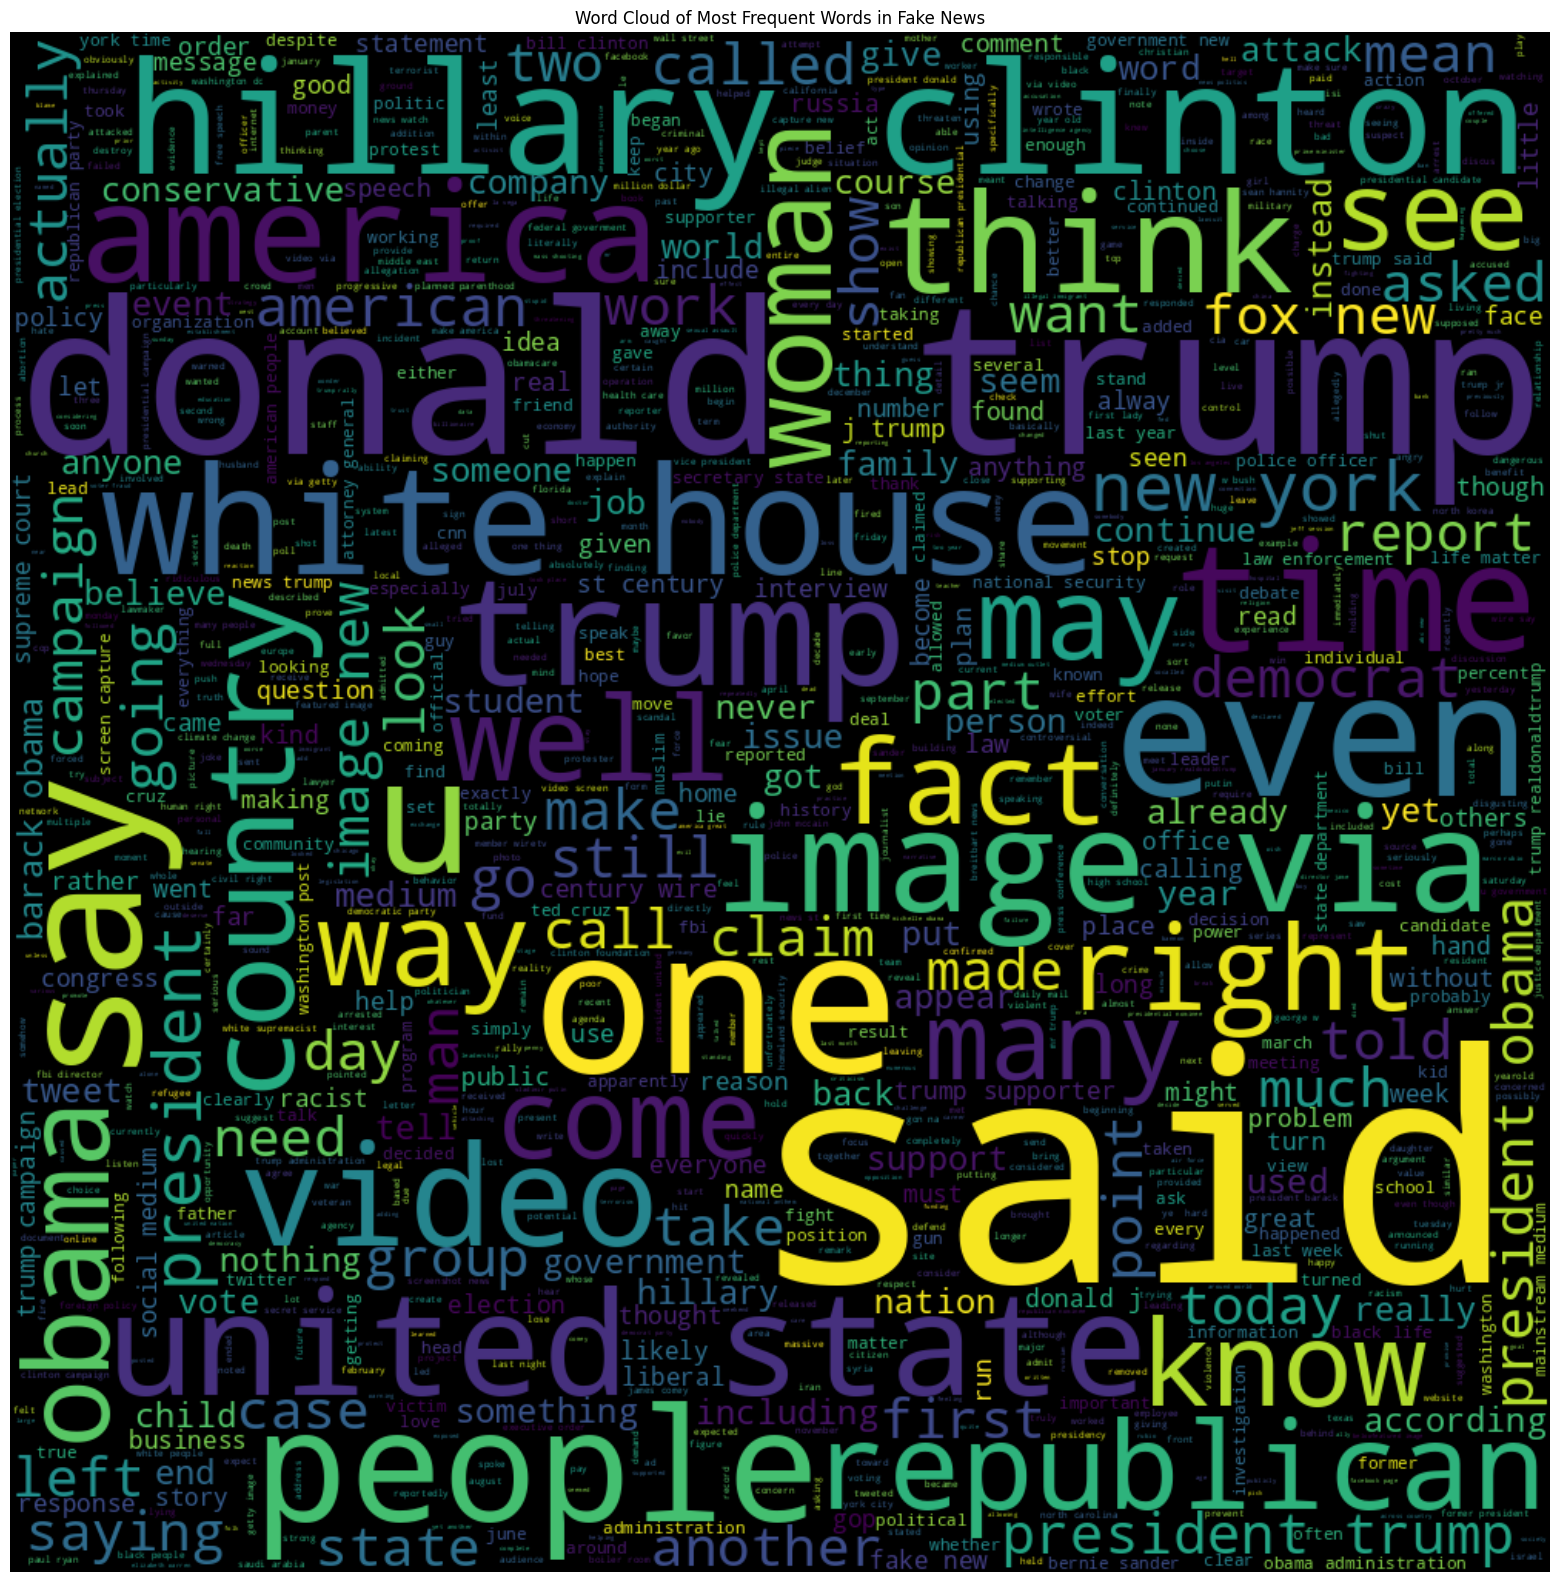

In [ ]:
# showing word cloud for fake news
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1000 , height = 1000 , stopwords = STOPWORDS).generate(" ".join(df[df.target == 0].clean_news))
plt.title('Word Cloud of Most Frequent Words in Fake News')
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')

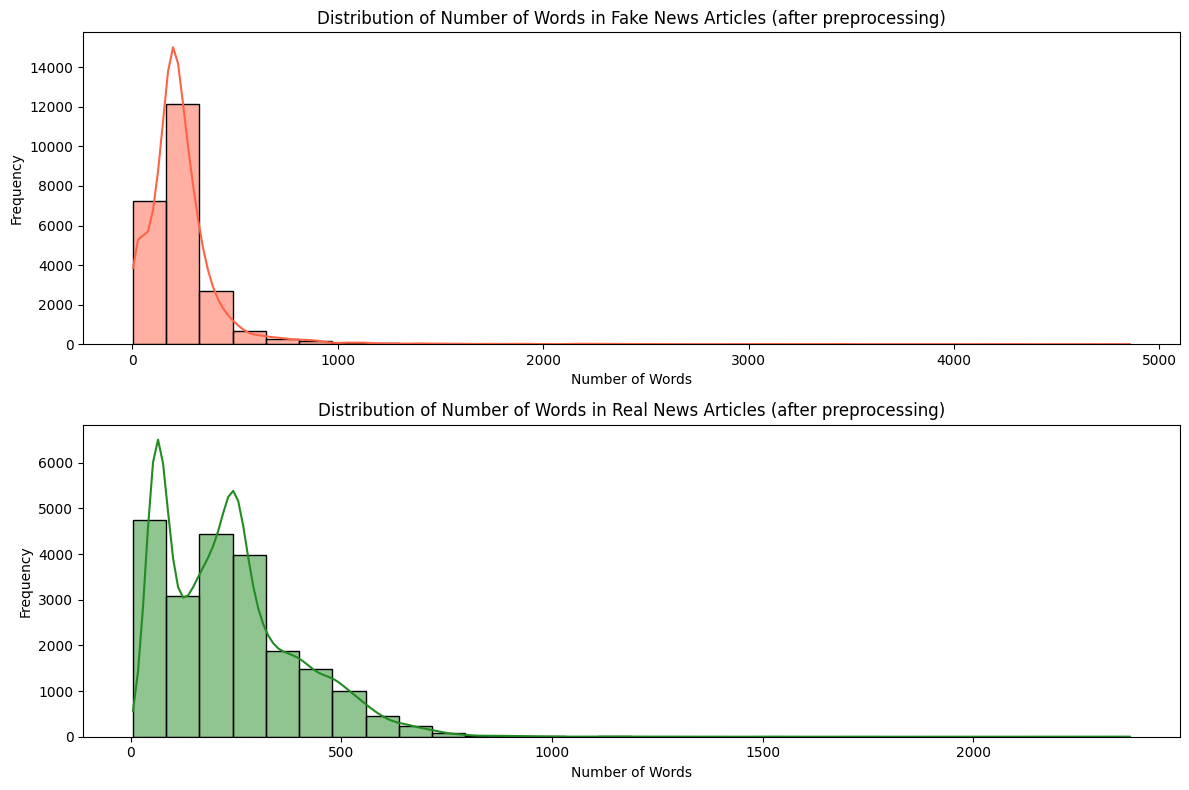

In [ ]:
# Distribution of number of words in real and fake news after the text are processed
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,8))

sns.histplot(data=df, x=df[df['target'] == 0]['clean_news'].apply(lambda x: len(x.split())), bins=30, kde=True, color='tomato', ax=ax1)
ax1.set_title('Distribution of Number of Words in Fake News Articles (after preprocessing)')
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Frequency')


sns.histplot(data=df, x=df[df['target'] == 1]['clean_news'].apply(lambda x: len(x.split())), bins=30, kde=True, color='forestgreen', ax=ax2)
ax2.set_title('Distribution of Number of Words in Real News Articles (after preprocessing)')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# LSTM

In [ ]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(df['clean_news'], df['target'], random_state=0)

Repsesenting each word by a number

In [ ]:
# obtain the total words present inthe dataset
list_of_words = []
for i in df.clean_news:
  for j in i.split():
    list_of_words.append(j.strip())

total_words = len(list(set(list_of_words)))
total_words

205619

In [ ]:
# constants
MAX_FEATURES=10000

# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = text.Tokenizer(num_words = MAX_FEATURES)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
# exportingtrained tokenizer
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [ ]:
# constants
MAX_LEN = 300
BATCH_SIZE = 256
EPOCH = 10
EMBED_SIZE = 128

In [ ]:
padded_train = sequence.pad_sequences(train_sequences,maxlen = MAX_LEN)
padded_test = sequence.pad_sequences(test_sequences,maxlen = MAX_LEN)

In [ ]:
model = Sequential()
# Non-trainable embeddidng layer
model.add(Embedding(input_dim=MAX_FEATURES , output_dim=EMBED_SIZE, input_length=MAX_LEN))
#LSTM
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 300, 128)          131584    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1463105 (5.58 MB)
Trainable params: 1463105 (5.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# constants
PATIENCE=5 # constant for early stopping patience level
VALIDATION_SPLIT=0.3 # validation set percentage


callbacks=[]
# early stopping to stop if the accuracy of model degrades after certain epoch
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
callbacks.append(early_stopping)
history = model.fit(padded_train, y_train, validation_split=0.3, epochs=EPOCH, batch_size=BATCH_SIZE, shuffle=True, callbacks=callbacks, verbose = 1)

Epoch 1/10
93/93 [==============================] - 202s 2s/step - loss: 0.2194 - accuracy: 0.9126 - val_loss: 0.1280 - val_accuracy: 0.9571
Epoch 2/10
93/93 [==============================] - 192s 2s/step - loss: 0.0798 - accuracy: 0.9751 - val_loss: 0.1686 - val_accuracy: 0.9452
Epoch 3/10
93/93 [==============================] - 193s 2s/step - loss: 0.0868 - accuracy: 0.9797 - val_loss: 0.0776 - val_accuracy: 0.9784
Epoch 4/10
93/93 [==============================] - 188s 2s/step - loss: 0.0168 - accuracy: 0.9954 - val_loss: 0.0270 - val_accuracy: 0.9938
Epoch 5/10
93/93 [==============================] - 194s 2s/step - loss: 0.0074 - accuracy: 0.9983 - val_loss: 0.0232 - val_accuracy: 0.9953
Epoch 6/10
93/93 [==============================] - 186s 2s/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0303 - val_accuracy: 0.9919
Epoch 7/10
93/93 [==============================] - 189s 2s/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0258 - val_accuracy: 0.9951
Epoch 8/10
93

In [ ]:
model.save("trained_nlp_model.h5") # saving the model in .h5 format

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(padded_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(padded_test,y_test)[1]*100 , "%")

1053/1053 [==============================] - 180s 171ms/step - loss: 0.0087 - accuracy: 0.9983
Accuracy of the model on Training Data is -  99.83369708061218 %
351/351 [==============================] - 59s 169ms/step - loss: 0.0358 - accuracy: 0.9919
Accuracy of the model on Testing Data is -  99.18931126594543 %


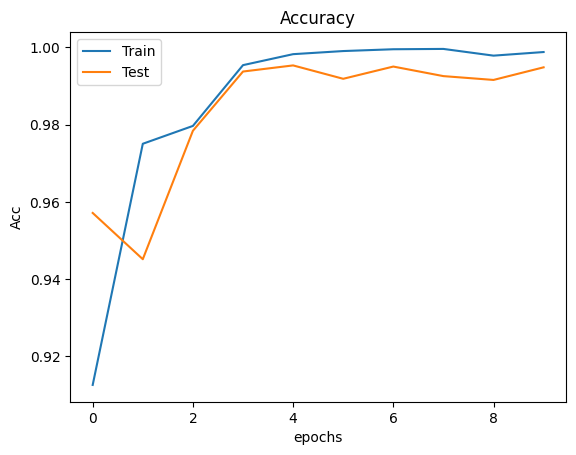

In [ ]:
# plotting train test accuracy scores with respect to epochs
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

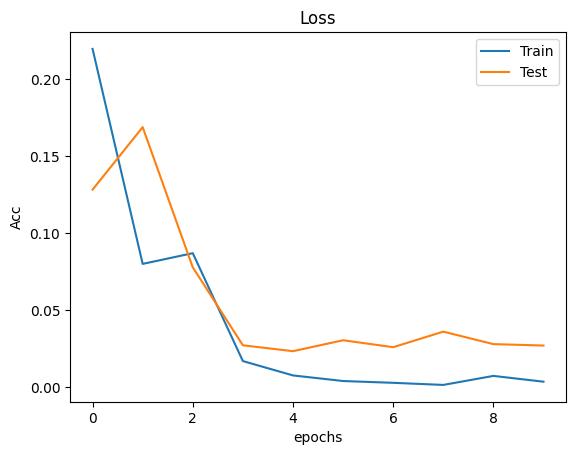

In [ ]:
# plotting train test loss scores with respect to epochs
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
pred = model.predict(padded_test)

351/351 [==============================] - 60s 171ms/step


In [ ]:
y_pred_classes = (pred > 0.5).astype(int)

In [ ]:
y_pred_classes.shape

(11225, 1)

In [ ]:

print(classification_report(y_test, y_pred_classes, target_names = ['Fake','Real']))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      5858
        Real       0.99      0.99      0.99      5367

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
cm

array([[5797,   61],
       [  30, 5337]])

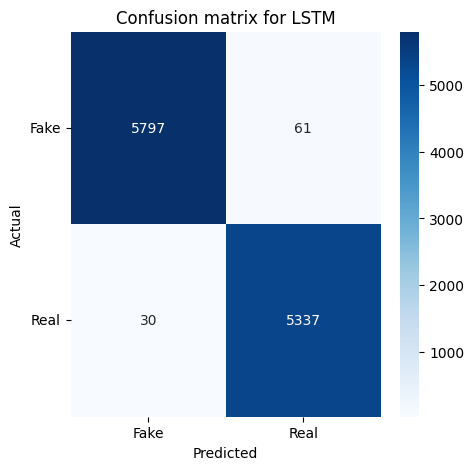

In [ ]:
# get the confusion matrix plot

# Define the labels and titles for the confusion matrix
classes = ['Fake', 'Real']
title = 'Confusion matrix for LSTM'

plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(title)

plt.yticks(rotation=0)
plt.show()

## Acknowledgements
* Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018.

* Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).